# Очистка и подготовка данных, Feature Engineering

Данные не всегда представляют собой идеально организованный набор наблюдений без каких-либо пропусков или аномалий Обычно данные содержат в себе кучу мусора, который необходимо почистить, да и вообще сами данные порой лучше воспринимать критически, для того чтобы затем привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.

Давайте рассмотрим типичные проблемы с данными:
    1. Пропущенные значения в данных
    2. Выбросы в данных
    3. Не структурированные, разбросанные по разным источникам данные

Остановимся на каждой проблеме поподробнее

Работать сегодня будет с датасетом о ценах на дома в Мельбурне. Источник данных: https://www.kaggle.com/dansbecker/melbourne-housing-snapshot/home

## Замена пропущенных значений

In [162]:
import pandas as pd
import numpy as np

In [163]:
data = pd.read_csv('melb_data.csv')#скачиваем данные

In [164]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [165]:
data.shape

(13580, 21)

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Посмотрим на количество пропусков в данных:

In [167]:
null_data = data.isnull().sum()
null_data[null_data>0]

Car               62
BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
dtype: int64

Разберем несколько способов справляться с пропущенными значениями

**1. Выкинуть столбцы с пропусками (не самый лучший вариант)**

Сначала избавимся от пропусков, которые нам не одолеть: это будут столбцы, где пропуски составляют более 40% от данных

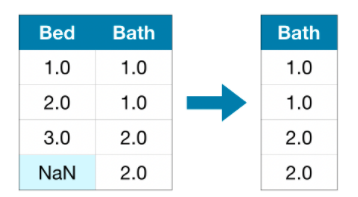

In [168]:
col_for_drop = [col for col in data.columns if data[col].isnull().sum()>data[col].shape[0]*0.4]
reduced_data = data.drop(col_for_drop, axis=1)
reduced_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [169]:
null_data = reduced_data.isnull().sum()
null_data[null_data>0]

Car              62
YearBuilt      5375
CouncilArea    1369
dtype: int64

**2. Заменить пропущенные значения константой (медианой, модой, средним)**

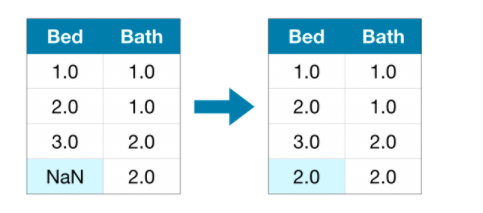

Теперь, когда мы избавились от ненужных столбцов, произведем заполнение пропущенных значений в оставшихся столбцах на константу

Вопрос: какие из оставшихся значений вы заполнили данные пропуски. Напишите код для заполнения пропусков в данных столбцах

In [170]:
inputer_data = reduced_data.copy()
inputer_data['Car'] = data['Car'].fillna(data['Car'].mode()[0])
inputer_data['CouncilArea'] = data['CouncilArea'].fillna(data['CouncilArea'].mode()[0])
inputer_data['YearBuilt'] = data['YearBuilt'].fillna(data['YearBuilt'].median())
inputer_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,1970.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [171]:
inputer_data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

**3. Создать новый признак в данных, который будет сигнализировать, что в данных было пропущенное значение, а пропуск заменить константой**

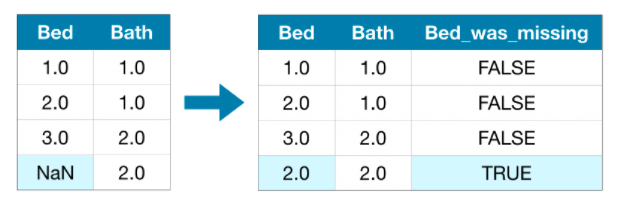

In [172]:
plus_data = reduced_data.copy()
for col in cols_with_missing:
    if col in plus_data:
        plus_data[col + '_was_missing'] = plus_data[col].isnull()
        plus_data[col + '_was_missing'] = plus_data[col].isnull()
plus_data['CouncilArea'] = data['CouncilArea'].fillna(data['CouncilArea'].mode()[0])
plus_data['Car'] = data['Car'].fillna(0)
plus_data['YearBuilt'] = data['YearBuilt'].fillna(data['YearBuilt'].median())
plus_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Car_was_missing,YearBuilt_was_missing,CouncilArea_was_missing
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,202.0,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,False,True,False
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,156.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,False,False,False
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,134.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,False,False,False
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,94.0,1970.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,False,True,False
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,120.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,False,False,False


In [173]:
plus_data.isnull().sum()

Suburb                     0
Address                    0
Rooms                      0
Type                       0
Price                      0
Method                     0
SellerG                    0
Date                       0
Distance                   0
Postcode                   0
Bedroom2                   0
Bathroom                   0
Car                        0
Landsize                   0
YearBuilt                  0
CouncilArea                0
Lattitude                  0
Longtitude                 0
Regionname                 0
Propertycount              0
Car_was_missing            0
YearBuilt_was_missing      0
CouncilArea_was_missing    0
dtype: int64

In [174]:
new_data = plus_data.copy()

## Выбросы в данных

**Вопрос:** чем категориальные признаки отличаются от нумеративных(числовых)?

Первым делом проверим типизацию наших данных

In [175]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Suburb                   13580 non-null  object 
 1   Address                  13580 non-null  object 
 2   Rooms                    13580 non-null  int64  
 3   Type                     13580 non-null  object 
 4   Price                    13580 non-null  float64
 5   Method                   13580 non-null  object 
 6   SellerG                  13580 non-null  object 
 7   Date                     13580 non-null  object 
 8   Distance                 13580 non-null  float64
 9   Postcode                 13580 non-null  float64
 10  Bedroom2                 13580 non-null  float64
 11  Bathroom                 13580 non-null  float64
 12  Car                      13580 non-null  float64
 13  Landsize                 13580 non-null  float64
 14  YearBuilt             

Посмотрим количество уникальные значений в столбцах Car, Bedroom2, Bathroom и YearBuilt

In [176]:
print('Car: {}'.format(new_data.Car.unique()))
print('Bedroom2: {}'.format(new_data.Bedroom2.unique()))
print('Bathroom: {}'.format(new_data.Bathroom.unique()))
print('YearBuilt: {}'.format(new_data.YearBuilt.nunique()))

Car: [ 1.  0.  2.  6.  5.  4.  3.  8.  7.  9. 10.]
Bedroom2: [ 2.  3.  4.  1.  6.  5.  0.  8.  9.  7. 20. 10.]
Bathroom: [1. 2. 3. 4. 0. 7. 5. 6. 8.]
YearBuilt: 144


Видно, что первые 3 признака являются категориальными, однако они закодированы типом float, что является не совсем корректным. Перекодируем их в int

In [177]:
new_data['Car'] = new_data['Car'].astype('int64')
new_data['Bedroom2'] = new_data['Car'].astype('int64')
new_data['Bathroom'] = new_data['Car'].astype('int64')
new_data['YearBuilt'] = new_data['Car'].astype('int64')
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Suburb                   13580 non-null  object 
 1   Address                  13580 non-null  object 
 2   Rooms                    13580 non-null  int64  
 3   Type                     13580 non-null  object 
 4   Price                    13580 non-null  float64
 5   Method                   13580 non-null  object 
 6   SellerG                  13580 non-null  object 
 7   Date                     13580 non-null  object 
 8   Distance                 13580 non-null  float64
 9   Postcode                 13580 non-null  float64
 10  Bedroom2                 13580 non-null  int64  
 11  Bathroom                 13580 non-null  int64  
 12  Car                      13580 non-null  int64  
 13  Landsize                 13580 non-null  float64
 14  YearBuilt             

**Вопрос:** видите ли вы еще какие-то признаки, которые можно было бы перекодировать

Следующим этапом проверим несколько различных столбцов на предмет выбросов. Обычно это делается с помощью визуализации данных и вычислением статистических параметров, но мы попробуем справиться с этим с помощью логики

In [144]:
new_data.Price.agg([np.mean, np.max, np.min, np.std])

mean    1.075684e+06
amax    9.000000e+06
amin    8.500000e+04
std     6.393107e+05
Name: Price, dtype: float64

Цена у нас в пределе нормы. Посмотрим на площадь территории

In [145]:
new_data.Landsize.agg([np.mean, np.max, np.min, np.std])

mean       558.416127
amax    433014.000000
amin         0.000000
std       3990.669241
Name: Landsize, dtype: float64

Подозрительным кажется здание с площадью в 433 км. При стандартном отклонении 4км и приемлимых ценах оно выбивается из распределения. Посмотрим на него поближе

**Задача:** напишите код, который найдет дома, чья площадь более 300км

In [146]:
new_data[new_data.Landsize > 300e3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Car_was_missing,YearBuilt_was_missing,CouncilArea_was_missing
11020,Fitzroy,389 Gore St,3,h,2700000.0,VB,Kay,12/08/2017,2.1,3065.0,...,433014.0,1,Yarra,-37.79751,144.98309,Northern Metropolitan,5825.0,False,True,False


Да. Это определенно какой-то выброс. Здание с такой гигантской площадью стоимостью всего 2.7 миллиона. На всякий случай избавимся от него

In [147]:
new_data = new_data[new_data.Landsize < 300e3]

Следующим шагом проверим координаты на наличие выбросов, чтобы удостовериться, действительно ли мы находимся в пределах Мельбурна

In [148]:
new_data['Lattitude'].agg([np.mean, np.max, np.min, np.std])

mean   -37.809204
amax   -37.408530
amin   -38.182550
std      0.079263
Name: Lattitude, dtype: float64

In [149]:
new_data['Longtitude'].agg([np.mean, np.max, np.min, np.std])

mean    144.995217
amax    145.526350
amin    144.431810
std       0.103919
Name: Longtitude, dtype: float64

Вопрос: а какие проверки с данными организовали бы вы сами?

## Фильтрация данных

А теперь представим себе ситуацию, что мы бы исследовали дома только в каких-то определенных районах с пороговой стоимостью. Такое часто бывает, если покупатель задает какие-то определенные рамки своего поиска. В таких случаях нам пригодится уже знакомая вам фильтрация

Посмотрим на 2ух комнатные помещения, у которых цена в пределах от 5 до 7 миллионов, находящиеся близко к центру города

In [199]:
min_cost = 3e6
max_cost = 10e6
distance = 2
count_room = 2
new_data.query('(@min_cost < Price <@max_cost) & (Distance<@distance) & (Rooms == @count_room) ')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Car_was_missing,YearBuilt_was_missing,CouncilArea_was_missing
6854,East Melbourne,110 Vale St,2,h,4525000.0,S,Caine,3/12/2016,1.5,3002.0,...,220.0,1,Melbourne,-37.8181,144.9879,Northern Metropolitan,3040.0,False,True,False


## Кодировка категориальных признаков

Кодирование признаков - важный скил для DataScientist'ов. Под кодидированием понимается переведение категориального признака в числовой

Рассмотрим два типа кодировки категориальных признаков: Label Encoding и One Hot Encoding

**Label Enconding**

Label Encoding присваивает каждому уникальному значению отдельное целое число:

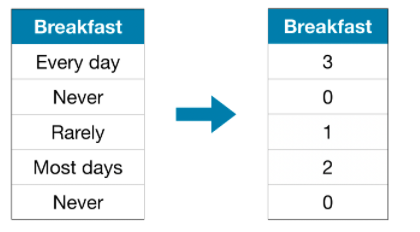

Давайте рассмотрим на примере:

In [150]:
new_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Car_was_missing,YearBuilt_was_missing,CouncilArea_was_missing
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,202.0,1,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,False,True,False
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,156.0,0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,False,False,False
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,134.0,0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,False,False,False
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,94.0,1,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,False,True,False
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,120.0,2,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,False,False,False


In [151]:
new_data.Type.unique()

array(['h', 'u', 't'], dtype=object)

Перекодируем столбец типа здания. Для этого реализуем специальную функцию

In [154]:
def encoding_Type(type_building):
    if type_building == 'h':
        return 0
    if type_building == 'u':
        return 1
    if type_building == 't':
        return 2
new_data['Type'].apply(encoding_Type)

0        0
1        0
2        0
3        0
4        0
        ..
13575    0
13576    0
13577    0
13578    0
13579    0
Name: Type, Length: 13579, dtype: int64

**Задача:** напишите код, который закодирует столбец с данными Method

In [155]:
new_data['Method'].unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

In [153]:
new_data.describe(include='object')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13579,13579,13579,13579,13579,13579,13579,13579
unique,314,13377,3,5,268,58,33,8
top,Reservoir,13 Robinson St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9448,9022,1565,473,2532,4695


**One Hot Enconding**

Следующим тип кодировки. который мы рассмотим - One Hot Encodig или dummy переменные

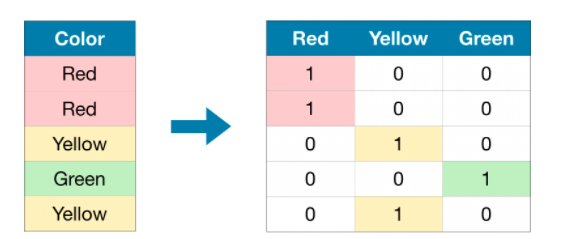

In [200]:
pd.get_dummies(new_data)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Lattitude,...,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1480000.0,2.5,3067.0,1,1,1,202.0,1,-37.79960,...,1,0,0,0,1,0,0,0,0,0
1,2,1035000.0,2.5,3067.0,0,0,0,156.0,0,-37.80790,...,1,0,0,0,1,0,0,0,0,0
2,3,1465000.0,2.5,3067.0,0,0,0,134.0,0,-37.80930,...,1,0,0,0,1,0,0,0,0,0
3,3,850000.0,2.5,3067.0,1,1,1,94.0,1,-37.79690,...,1,0,0,0,1,0,0,0,0,0
4,4,1600000.0,2.5,3067.0,2,2,2,120.0,2,-37.80720,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,2,2,2,652.0,2,-37.90562,...,0,0,0,0,0,0,1,0,0,0
13576,3,1031000.0,6.8,3016.0,2,2,2,333.0,2,-37.85927,...,0,0,0,0,0,0,0,0,1,0
13577,3,1170000.0,6.8,3016.0,4,4,4,436.0,4,-37.85274,...,0,0,0,0,0,0,0,0,1,0
13578,4,2500000.0,6.8,3016.0,5,5,5,866.0,5,-37.85908,...,0,0,0,0,0,0,0,0,1,0


14082 колонки. Кошмар. Не то, чего мы ожидали. Это произошло из-за того, что в некоторых столбцах было слишком много уникальных значений, что повлекло за собой вот такое обилие столбцов. Модель на таком обучать очень тяжело да и воспринимать это тоже. Отсюда мы делаем вывод, что нам нужно уметь совмещать два типа кодировки. Для столбцов с маленьким количеством уникальных значений необходимо применять LabelEncoding. Для столбцов с большим количеством уникальных значений будем использовать get_dummies

Для того, чтобы использовать get_dummies на определенных столбцах есть специальный параметр

In [201]:
pd.get_dummies(new_data, columns=['CouncilArea'])

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,0,0,0,0,0,0,0,0,1,0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0,0,0,0,0,0,0,0,1,0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0,0,0,0,0,0,0,0,1,0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,0,0,0,0,0,0,0,0,1,0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,1,0,0,0,0,0,0,0,0,0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,1,0,0,0,0,0,0,0,0,0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,1,0,0,0,0,0,0,0,0,0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1,0,0,0,0,0,0,0,0,0


Задание на самостоятельную проработку: напишите функцию, которая принимает в себя датафрейм **data** и порог кодировки **N** и перекодирует его признаки таким образом, что, если число уникальных значений > N, то используется LabelEncoding, в противном случае One Hot Encoding. Функция должна возвращать перекодированный датафрейм

## Feature Engineering

**Зачем вообще нам нужен feature engineering?**

Когда мы работаем с данными, мы часто хотим построить предиктивные модели - алгоритмы, которые осуществляют то или иное предсказание исходя из данных.

Например, у нас есть данные о погоде за прошлые 100 лет. Мы хотим предсказать погоду на завтра. Что мы делаем? Строим модель, которая предсказывает погоду по входящим данным. 

Но иногда данных бывает недостаточно или они бывают плохие (на самом деле, данные всегда плохие, запомните это). В этом случае нужно прибегать к очистке данных и созданию новых признаков. 

In [202]:
new_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Car_was_missing,YearBuilt_was_missing,CouncilArea_was_missing
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,202.0,1,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,False,True,False
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,156.0,0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,False,False,False
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,134.0,0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,False,False,False
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,94.0,1,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,False,True,False
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,120.0,2,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,False,False,False


**Поработаем со временем**

Временные признаки бывают очень интересными и полезными в задачах Feature Engineering. С помощью pandas можно отлично поработать с датами и вытащить из них очень полезные вещи. В нашем датасете есть признак даты продажи. Из него можно извлечь например такие данные как сезонность продаж, их периодичность, понять, в какие дни недели/месяца/года дома продаются лучшего всего

In [203]:
pd.to_datetime(new_data['Date'])  

0       2016-03-12
1       2016-04-02
2       2017-04-03
3       2017-04-03
4       2016-04-06
           ...    
13575   2017-08-26
13576   2017-08-26
13577   2017-08-26
13578   2017-08-26
13579   2017-08-26
Name: Date, Length: 13580, dtype: datetime64[ns]

In [205]:
new_data['Date'] = pd.to_datetime(new_data['Date'])  
new_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Car_was_missing,YearBuilt_was_missing,CouncilArea_was_missing
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,202.0,1,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,False,True,False
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,156.0,0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,False,False,False
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,134.0,0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,False,False,False
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,...,94.0,1,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,False,True,False
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,...,120.0,2,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,False,False,False


Создадим признак месяца и поймем в какое время года продажи на высоте

In [217]:
new_data['Month_of_sold'] = new_data['Date'].dt.month
new_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Car_was_missing,YearBuilt_was_missing,CouncilArea_was_missing,Month_of_sold
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,False,True,False,3
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,False,False,False,4
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,False,False,False,4
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,...,1,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,False,True,False,4
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,...,2,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,False,False,False,4


In [231]:
new_data['Month_of_sold'].value_counts()

8     1850
7     1835
5     1644
6     1469
3     1408
4     1246
9     1188
10     854
11     750
12     725
2      333
1      278
Name: Month_of_sold, dtype: int64

Возможные атрибуты dt
1. year: возвращает год
2. month: возвращает месяц
3. day: возвращает день
4. hour, minute, second - час, минута, секунда
5. dayofweek - день недели, от 0 до 6, где 0 - понедельник, 6 - воскресенье

**Задание:** напишите код, который помог бы понять, в какие дни недели нам стоит продавать наши дома

Помимо даты можно работать и с другими признаками. Давайте вместе подумаем, какие признаки еще можно было бы наворотить из наших столбцов. Для этого напоминаю вам их список

In [233]:
new_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'Car_was_missing',
       'YearBuilt_was_missing', 'CouncilArea_was_missing', 'Month_of_sold'],
      dtype='object')

## Спасибо за внимание! Буду рад ответиить на ваши вопросы

Форма ОС:
https://forms.gle/w6TjMeYPDYqQAFSJ8 
